# Loading Library

In [1]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00


In [2]:
from IPython import display
from roboflow import Roboflow
from ultralytics import YOLO

display.clear_output()
from IPython.display import display, Image

# Loading Data

In [3]:
rf = Roboflow(api_key="A0JN8vO130atlzhwM2JN")
project = rf.workspace("roboflow-100").project("construction-safety-gsnvb")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.82, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to construction-safety-2 in yolov8:: 100%|██████████| 2424/2424 [00:01<00:00, 1680.23it/s]


# Train The Model

In [4]:
model = YOLO('yolov8n.pt')

# Train the model
model.train(data='/content/construction-safety-2/data.yaml', epochs=50, batch=16)

100%|██████████| 6.25M/6.25M [00:00<00:00, 117MB/s]


Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/construction-safety-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 24.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/construction-safety-2/train/labels... 997 images, 0 backgrounds, 0 corrupt: 100%|██████████| 997/997 [00:00<00:00, 1851.14it/s]

train: New cache created: /content/construction-safety-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/construction-safety-2/valid/labels... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<00:00, 1668.51it/s]

val: New cache created: /content/construction-safety-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.58G      1.424      2.187      1.422         47        640: 100%|██████████| 63/63 [00:36<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        119        715      0.774        0.2      0.463      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.39G      1.379      1.319      1.355         86        640: 100%|██████████| 63/63 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        119        715      0.699      0.511      0.578      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.37G      1.384      1.269      1.378         47        640: 100%|██████████| 63/63 [00:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        119        715       0.81      0.577      0.668       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.85G      1.385       1.22      1.352         85        640: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        119        715      0.675      0.554      0.651      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.58G      1.356      1.138      1.334         56        640: 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        119        715      0.735       0.63        0.7      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.65G      1.346      1.107      1.316         42        640: 100%|██████████| 63/63 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        119        715      0.833      0.636      0.808      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.39G      1.327      1.071      1.312         62        640: 100%|██████████| 63/63 [00:23<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        119        715      0.676      0.696      0.743      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.37G      1.338      1.056      1.318         82        640: 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        119        715      0.722      0.675      0.737      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.54G      1.317      1.017      1.296         54        640: 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        119        715      0.815      0.661      0.763      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.5G      1.299     0.9772      1.279         71        640: 100%|██████████| 63/63 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        119        715      0.772      0.757      0.853      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.54G      1.301     0.9544      1.283         56        640: 100%|██████████| 63/63 [00:23<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        119        715      0.803      0.787       0.83      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.46G      1.294     0.9462      1.279         65        640: 100%|██████████| 63/63 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        119        715       0.77      0.799      0.814      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.39G      1.271     0.9293      1.268         75        640: 100%|██████████| 63/63 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        119        715      0.786      0.806      0.858      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.57G       1.27     0.9073      1.261         70        640: 100%|██████████| 63/63 [00:22<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        119        715      0.842      0.782      0.842      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.56G      1.279     0.9023      1.263         94        640: 100%|██████████| 63/63 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        119        715      0.865      0.724      0.808      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.41G      1.256     0.8779      1.262         49        640: 100%|██████████| 63/63 [00:23<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        119        715        0.8      0.726      0.816      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.55G       1.23     0.8551      1.249         95        640: 100%|██████████| 63/63 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]


                   all        119        715      0.858      0.765      0.838      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.48G      1.226     0.8491      1.241         78        640: 100%|██████████| 63/63 [00:23<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        119        715      0.745      0.823      0.848       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.48G       1.26     0.8423      1.246         48        640: 100%|██████████| 63/63 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        119        715      0.813      0.776       0.81      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.75G      1.231       0.83      1.238         47        640: 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        119        715       0.78      0.787      0.838      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.65G      1.206     0.7957      1.217         93        640: 100%|██████████| 63/63 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        119        715      0.828      0.814      0.874      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G      1.211     0.7865      1.218         66        640: 100%|██████████| 63/63 [00:23<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        119        715      0.814       0.81      0.851      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.45G      1.204     0.7811      1.221         67        640: 100%|██████████| 63/63 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        119        715      0.833      0.764      0.855      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.35G      1.179     0.7604      1.214         51        640: 100%|██████████| 63/63 [00:23<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        119        715      0.881      0.781      0.857      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.55G      1.191     0.7625      1.208         52        640: 100%|██████████| 63/63 [00:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        119        715      0.772      0.768      0.791      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.54G      1.189     0.7671      1.211         68        640: 100%|██████████| 63/63 [00:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        119        715      0.779      0.797      0.816      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.58G      1.172     0.7511      1.207         47        640: 100%|██████████| 63/63 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        119        715      0.866       0.81      0.852      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.55G      1.163     0.7417      1.197         60        640: 100%|██████████| 63/63 [00:23<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        119        715      0.866      0.796      0.859      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.6G      1.175     0.7225        1.2         55        640: 100%|██████████| 63/63 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        119        715      0.893      0.799      0.863      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.47G      1.141     0.7134      1.193         51        640: 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        119        715      0.786      0.824       0.86      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.79G      1.131     0.7074      1.182         85        640: 100%|██████████| 63/63 [00:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        119        715      0.841      0.844      0.876      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.51G      1.149     0.7109      1.195         77        640: 100%|██████████| 63/63 [00:23<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        119        715      0.889      0.775      0.864      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G      1.138     0.7016       1.19         68        640: 100%|██████████| 63/63 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        119        715      0.877      0.761      0.856      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.5G      1.122     0.6834      1.172         78        640: 100%|██████████| 63/63 [00:23<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        119        715      0.872      0.802      0.856      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.42G      1.108     0.6768      1.176         66        640: 100%|██████████| 63/63 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        119        715      0.886      0.765      0.851      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.64G      1.103     0.6789      1.163         54        640: 100%|██████████| 63/63 [00:23<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        119        715       0.88      0.786      0.852      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.74G      1.092     0.6585      1.165         82        640: 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        119        715      0.898      0.785      0.861      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.53G      1.104     0.6692      1.154         65        640: 100%|██████████| 63/63 [00:23<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        119        715      0.877      0.789      0.852      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.47G      1.084     0.6442      1.158         30        640: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        119        715      0.899      0.806       0.88      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.59G      1.076     0.6374      1.152         90        640: 100%|██████████| 63/63 [00:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        119        715      0.866      0.802      0.869      0.496


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.29G      1.061     0.6116      1.146         40        640: 100%|██████████| 63/63 [00:25<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        119        715      0.865      0.798       0.86      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.2G      1.037      0.576      1.131         24        640: 100%|██████████| 63/63 [00:23<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        119        715      0.884      0.776      0.854      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.26G      1.012     0.5557      1.112         31        640: 100%|██████████| 63/63 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        119        715      0.878      0.801      0.881      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G      1.002      0.548      1.109         32        640: 100%|██████████| 63/63 [00:23<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        119        715      0.874      0.821      0.883        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.25G      1.003     0.5429      1.113         24        640: 100%|██████████| 63/63 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        119        715      0.877      0.784      0.863      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.26G     0.9928     0.5391      1.109         19        640: 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        119        715      0.889      0.788      0.876      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.31G      0.981     0.5296      1.105         34        640: 100%|██████████| 63/63 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        119        715      0.882      0.801      0.865      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.28G     0.9778     0.5252      1.098         61        640: 100%|██████████| 63/63 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        119        715      0.926      0.786      0.868      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.28G     0.9683     0.5215      1.094         26        640: 100%|██████████| 63/63 [00:24<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        119        715      0.882      0.782      0.866      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G     0.9612     0.5117      1.088         27        640: 100%|██████████| 63/63 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


                   all        119        715      0.881      0.785       0.87      0.495

50 epochs completed in 0.363 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all        119        715      0.902      0.803       0.88      0.501
                helmet        117        232      0.911      0.931      0.951       0.54
             no-helmet          6         11      0.895      0.545      0.701      0.334
               no-vest         52         90      0.864      0.776      0.868      0.441
                person        115        241      0.926      0.941       0.95      0.641
                  vest         74        141      0.913       0.82      0.929      0.551
Speed: 0.6ms preprocess, 5.5ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c87e7d90550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# Evaluation Model

In [6]:
model.val(data='/content/construction-safety-2/data.yaml')

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/construction-safety-2/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


                   all        119        715      0.909      0.809      0.879      0.495
                helmet        117        232      0.911      0.931      0.949      0.536
             no-helmet          6         11      0.909      0.545      0.697      0.295
               no-vest         52         90      0.877      0.811      0.869      0.445
                person        115        241      0.926      0.941      0.951      0.641
                  vest         74        141       0.92      0.819      0.932      0.557
Speed: 0.5ms preprocess, 8.6ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c87e63b4100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

[Errno 2] No such file or directory: '{HOME}'
/content


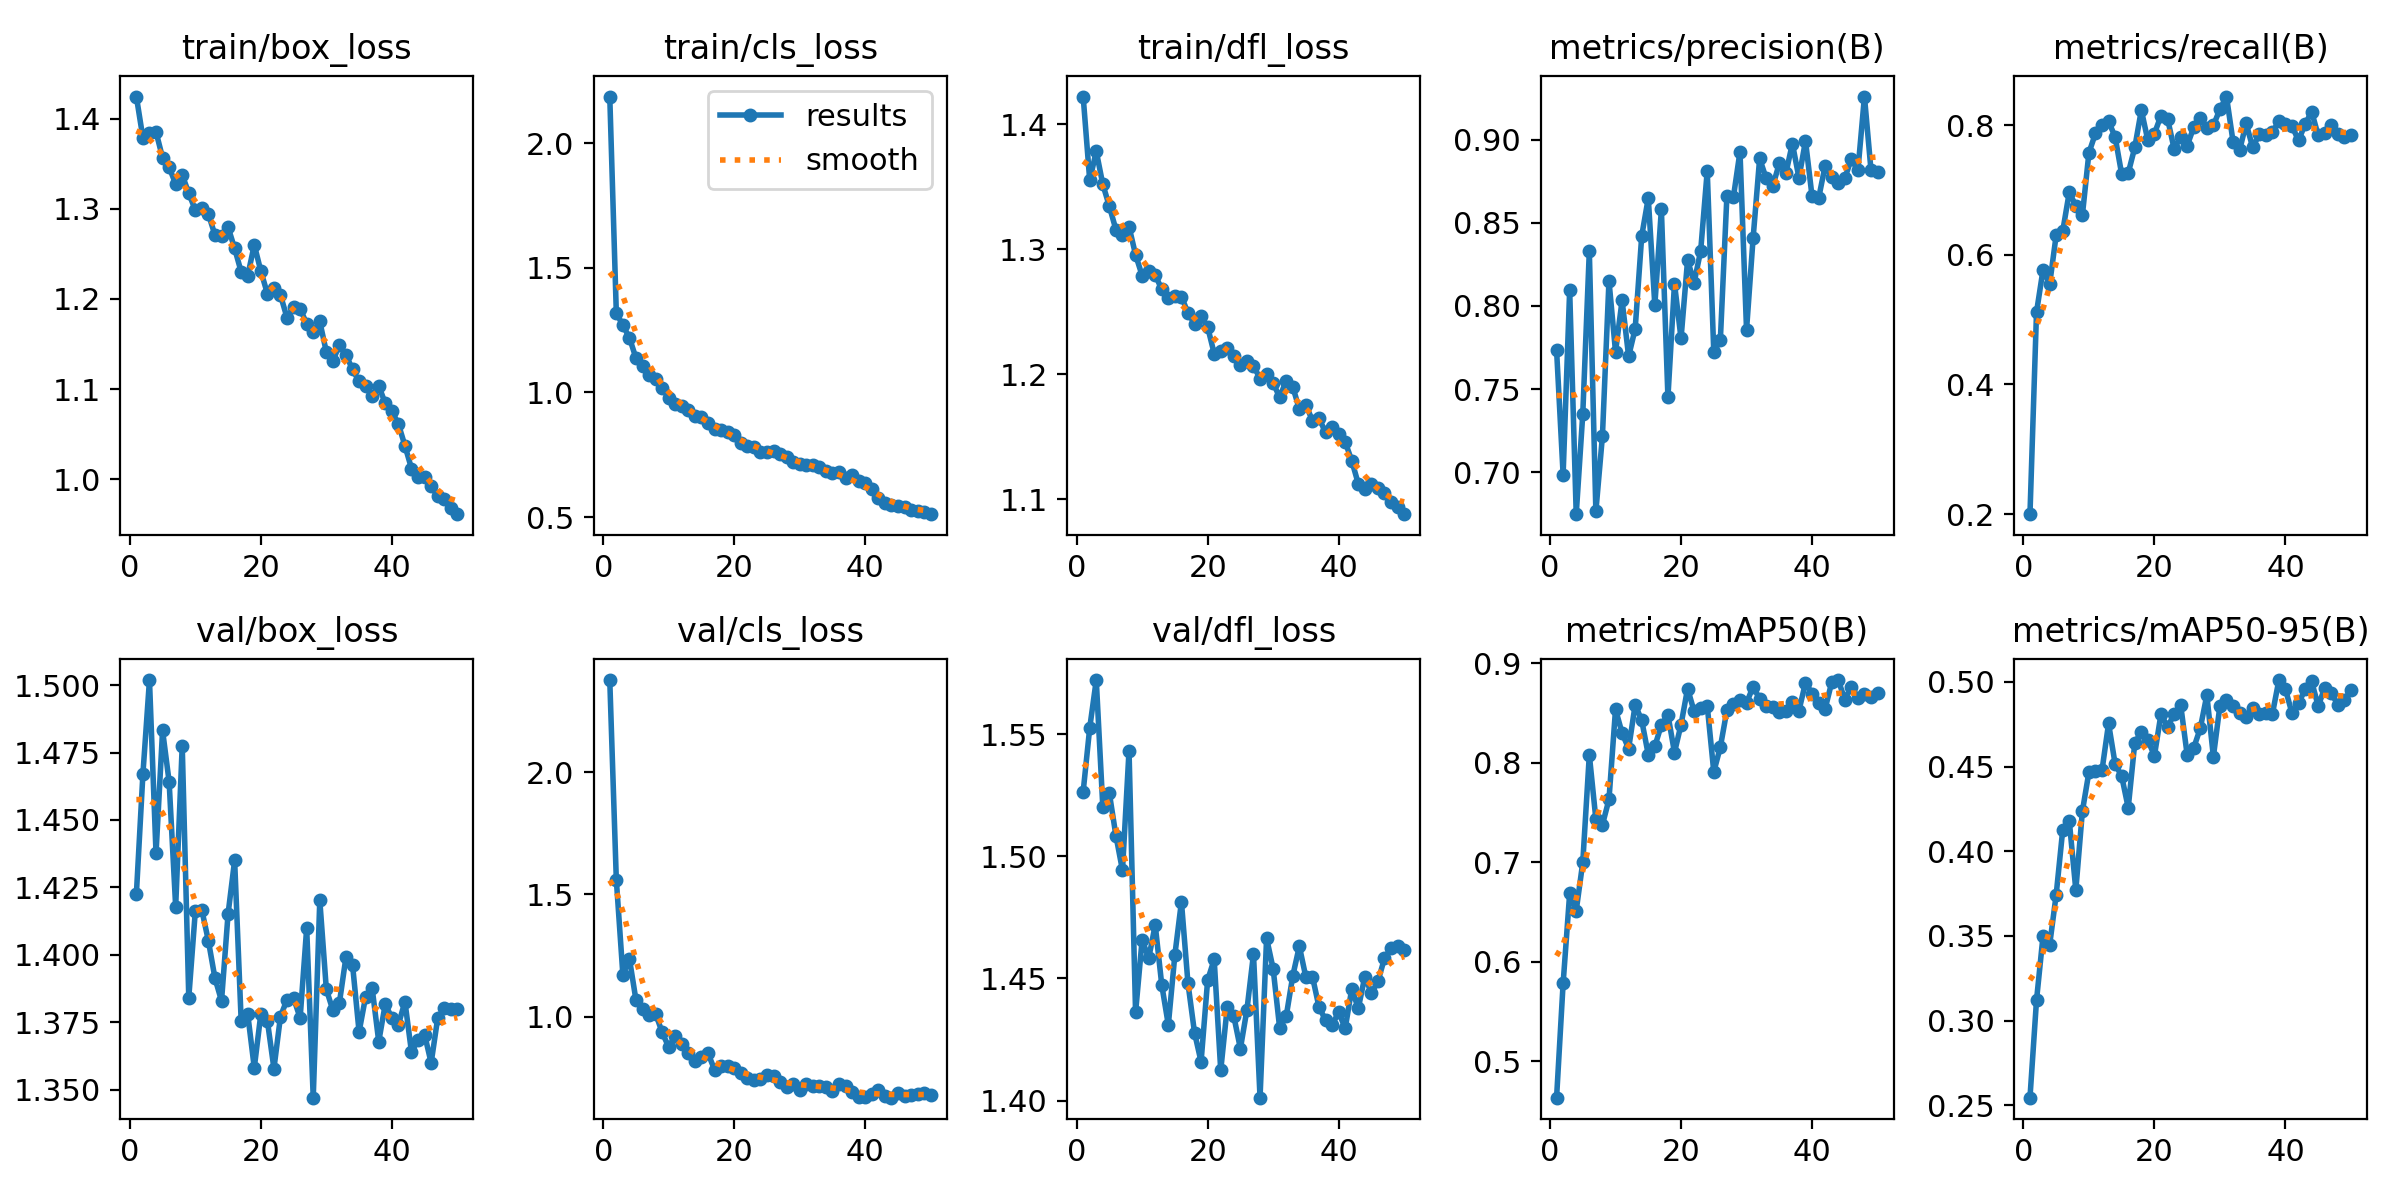

In [7]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

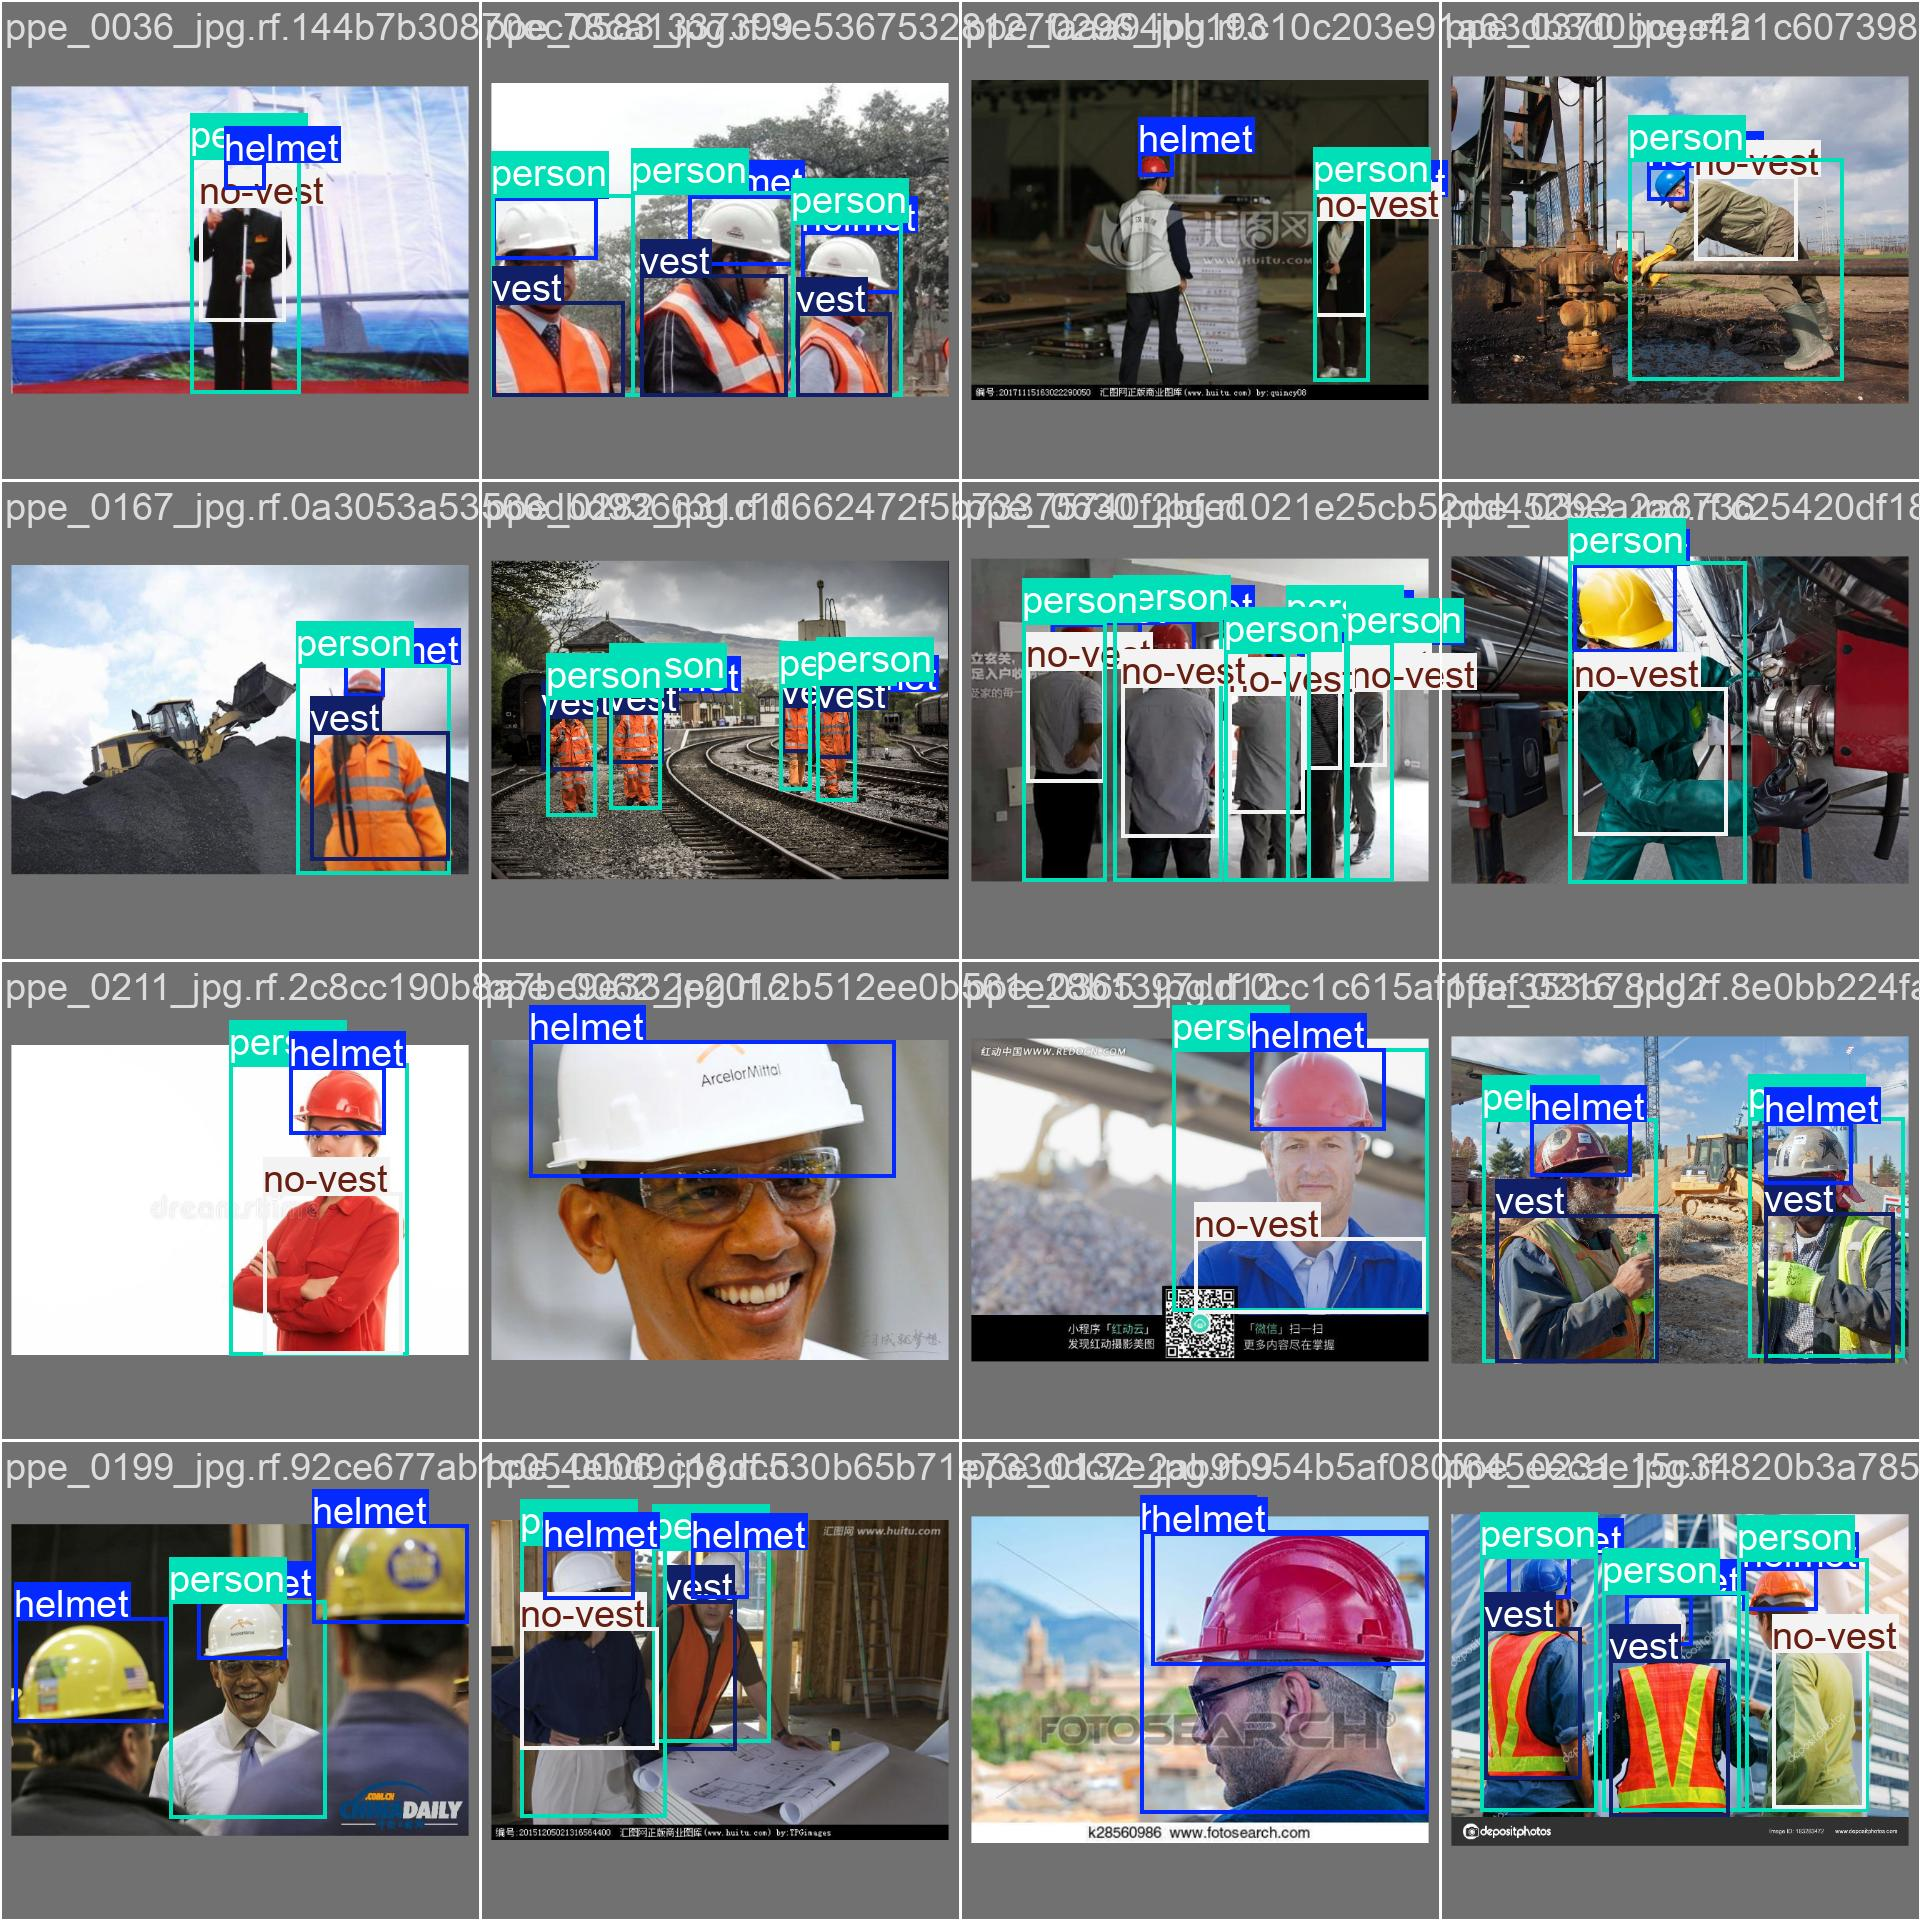

In [8]:
Image(filename=f'/content/runs/detect/train/val_batch2_labels.jpg', width=600)

# Tracking

In [ ]:
# --------------- construction safety Detection -------------------

from ultralytics import YOLO
import cv2
import pandas as pd
import pygame

path_alarm = r"C:\Users\osama\OneDrive\Desktop\Moahmmed Upwork\mixkit-facility-alarm-sound-999.wav"
pygame.init()
pygame.mixer.music.load(path_alarm)

# video = cv2.VideoCapture(0)
video = cv2.VideoCapture(r'C:\Users\osama\OneDrive\Desktop\Moahmmed Upwork\Civil Engineering Technician Career Video.mp4')
model = YOLO(r'C:\Users\osama\Downloads\construction safety.pt')
class_list = {0: 'Helmet', 1: 'No Helmet', 2: 'No Vest', 3: 'Person', 4: 'Vest'}

person_axis = []
count = 0

while True:
    _, image = video.read()
    if image is None:  # Break the loop if the video ends
        break

    image_copy = image.copy()
    h, w, c = image.shape

    image = cv2.flip(image, 1)
    result = model.predict(image)

    a = result[0].boxes.data
    px = pd.DataFrame(a).astype(float)

    # Flags to check if "No Helmet" or "No Vest" is detected
    no_helmet_detected = False
    no_vest_detected = False

    for index, row in px.iterrows():
        x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])
        cls = class_list[int(row[5])]
        confidence = row[4]

        if confidence <= 0.4:
            continue

        if cls == 'No Helmet':
            no_helmet_detected = True
        elif cls == 'No Vest':
            no_vest_detected = True

        if cls in ('Helmet', 'Vest', 'Person'):
            if cls == 'Person':
                person_axis.append((x1, y1, x2, y2))
                count += 1
            color = (0, 255, 0)
        elif cls in ('No Helmet', 'No Vest'):
            color = (0, 0, 255)
        else:
            continue

        if color == (0, 0, 255) and len(person_axis) >= 1:
            x11, y11, x22, y22 = person_axis[count - 1]
            person_status = image_copy[y11:y22, x1:x22]
            cv2.imwrite(rf'D:\Construction-Safety\images\person{count}.png', person_status)

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.rectangle(image, (x1, y1 - 25), (x1 + 200, y1), color, -1)

        cv2.putText(image, f'id:{index}', (x1, y1 - 10), cv2.FONT_ITALIC, 0.7, (0, 0, 0), 1)
        cv2.putText(image, f'{cls}', (x1 + 55, y1 - 10), cv2.FONT_ITALIC, 0.7, (0, 0, 0), 1)
        cv2.putText(image, f'{round(confidence, 2)}', (x1 + 150, y1 - 10), cv2.FONT_ITALIC, 0.7, (0, 0, 0), 1)

    # Control the alarm sound based on detection flags
    if no_helmet_detected or no_vest_detected:
        if not pygame.mixer.music.get_busy():
            pygame.mixer.music.play()
    else:
        if pygame.mixer.music.get_busy():
            pygame.mixer.music.stop()

    cv2.imshow('image', image)
    if cv2.waitKey(1) == ord('o'):
        break

cv2.destroyAllWindows()
video.release()
